# Homework 2      
**Fatemeh Ahmadvand s301384**

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

Number of nodes:  5
\Vector w:
 [0.6   1.    1.    1.    0.667]

Matrix D:
 [[0.6   0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.667]]

Matrix P:
 [[0.    0.667 0.333 0.    0.   ]
 [0.    0.    0.75  0.25  0.   ]
 [0.5   0.    0.    0.5   0.   ]
 [0.    0.    0.333 0.    0.667]
 [0.    0.5   0.    0.5   0.   ]]

Matrix Q:
 [[0.4   0.4   0.2   0.    0.   ]
 [0.    0.    0.75  0.25  0.   ]
 [0.5   0.    0.    0.5   0.   ]
 [0.    0.    0.333 0.    0.667]
 [0.    0.333 0.    0.333 0.333]]
pi_bar= [0.185 0.148 0.222 0.222 0.222]


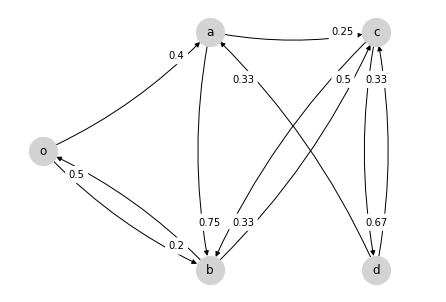

In [2]:
np.random.seed(seed=42)
np.set_printoptions(precision=3, suppress=True)  #Number of digits of precision for floating point output
# lambda : Transition Matrix
Lambda = [                          
    [0, 2 / 5, 1 / 5, 0, 0],
    [0, 0, 3 / 4, 1 / 4, 0],
    [1 / 2, 0, 0, 1 / 2, 0],
    [0, 0, 1 / 3, 0, 2 / 3],
    [0, 1 / 3, 0, 1 / 3, 0],
]

G = nx.DiGraph()
G.add_nodes_from(['o', 'a', 'b', 'c', 'd'])
G.add_weighted_edges_from([('o', 'a', float("{0:.2f}".format(2 / 5))), ('o', 'b', float("{0:.2f}".format(1 / 5))),
                           ('a', 'b', float("{0:.2f}".format(3 / 4))), ('a', 'c', float("{0:.2f}".format(1 / 4))),
                           ('b', 'o', float("{0:.2f}".format(1 / 2))), ('b', 'c', float("{0:.2f}".format(1 / 2))),
                           ('c', 'b', float("{0:.2f}".format(1 / 3))), ('c', 'd', float("{0:.2f}".format(2 / 3))),
                           ('d', 'a', float("{0:.2f}".format(1 / 3))), ('d', 'c', float("{0:.2f}".format(1 / 3)))])
pos = {'o': (0, 0), 'a': (1, 2), 'b': (1, -2), 'c': (2, 2), 'd': (2, -2)}
nx.draw(G, pos=pos, with_labels=True, node_size=800, font_size=12, node_color='lightgray',
        connectionstyle='arc3, rad = 0.1')
labels = {e: G.edges[e]['weight'] for e in G.edges}
val = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.20, rotate=False,
                                   horizontalalignment='center')

n_nodes = len(G.nodes)

w = np.sum(Lambda, axis=1)
w_star = np.max(w)

# contruct the P matrix (instead of Q) and clock rates w
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda  #normalized adjacency matrix of the graph
P_cum = np.cumsum(P, axis=1)

# compute the off-diagonal part of Q
Q = Lambda / w_star
# add the diagonal part
Q = Q + np.diag(np.ones(len(w)) - np.sum(Q, axis=1))

Q_cum = np.cumsum(Q, axis=1)

print("Number of nodes: ", n_nodes)
print("\Vector w:\n", w)
print("\nMatrix D:\n", D)
print("\nMatrix P:\n", P)
# print("\nMatrix P_cum:\n", P_cum)
print("\nMatrix Q:\n", Q)
# print("\nMatrix Q_cum:\n", Q_cum)

# compute dominant eigenvector
# Compute invariant distribution pi_bar
values, vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi_bar = vectors[:, index].real
pi_bar = pi_bar / np.sum(pi_bar)
print("pi_bar=", pi_bar)

**problem 1 _ a **

In [3]:
# set the number of steps in the n_simulations=10000
def simulateRandomWalk(origin, destination, n_simulations=10000):
    # problem 1 _ a:
    # t_next = -np.log(np.random.rand())/w[1] #Poison clock of node 'a'

    # array_return_time will keep trace of the visited states
    array_return_time = np.zeros(n_simulations, dtype=float)

    for j in range(n_simulations):  # iterate over simulations
        pos = []
        # we start from state 'a'
        pos.append(origin)  # node 1 -> 'a'
        transition_times = []
        # store the time instant of the current transition
        transition_times.append(0)
        node_counter = 0
        # the random time to wait for the next transition
        # is drawn according to its distribution, discussed in Note1
        # NOTE: in the formula for t_next we use the rate of the clock of 
        # the current state, in this case w_star.    
        t_next = -np.log(np.random.rand()) / w_star

        while True:
            node_counter += 1
            # append index
            # the next state to visit will be extracted according to the probabilities
            # stored in the row of Q_cum corresponding to the current state.
            pos.append(np.argwhere(Q_cum[pos[node_counter - 1]] > np.random.rand())[0][0])
            # store the time instant of the current transition
            transition_times.append(transition_times[node_counter - 1] + t_next)
            
            # the particle is in node 'a' after exiting from it
            if pos[node_counter] == destination: 
                break
            # compute the waiting time to the next transition
            # NOTE: we use the rate w_star of the clock of the current position
            t_next = -np.log(np.random.rand()) / w_star

        array_return_time[j] = transition_times[-1]

    avg_return_time = np.mean(array_return_time)
    print("Average return time: {} s".format(avg_return_time))
    return avg_return_time

print("******\nProblem 1 - A : \n")
simulationAvgTime = simulateRandomWalk(origin=1, destination=1, n_simulations=10000)
print("\n*****")

******
Problem 1 - A : 

Average return time: 6.645609572207408 s

*****


**problem 1 _ b **

The expected hitting times  $\hat{x}= (\mathbb{E}_i[T_S])_{i \in R}$ for the set $S$ and for all nodes $i \in R = \mathcal V \setminus S$ can be computed by solving the system of equations

$$
\hat{x} = \mathbf{1} + \hat{P}\hat{x},
$$ 

where $\hat{P}$ is obtained from $P$ (the normalized weight matrix of the graph) by removing the rows and columns corresponding to the nodes in the set $S$.

More explicitly, the expected hitting times can be expressed as

$$
\hat{x} = (I - \hat{P})^{-1} \mathbf{1}
$$

**Remark**: note that $(I - \hat{P})$ is invertible only if $V \setminus S$ has at least a link pointing to $S$. Indeed, if $(I - \hat{P})$ is not invertible. the random walk starting from nodes in $V \setminus S$ cannot hit nodes in $S$, and the hitting times diverge.

the theoretical return-time obtains 

$$
E_a[T_a^{(+)}] = \dfrac{1}{{\omega_a} {\bar{\pi_a}}}
$$

Thus, we get:

In [4]:
# Problem1 b
# define the set S and the remaining nodes R
node = 1
S = [node]

# define the remaining nodes R
R = [node for node in range(n_nodes) if node not in S]

# restrict P to R x R and obtain hat(P)
hatP = P[np.ix_(R, R)]
hatw = w[np.ix_(R)]

# hat(x) is the solution of the linear system
# np.linalg.solve solves a linear matrix equation given
# the coefficient matrix and the dependent variable values
hatx = np.linalg.solve((np.identity(n_nodes - len(S)) - hatP), (np.ones(n_nodes - len(S)) / hatw))

# define the hitting times to the set S
# hitting time = 0 if the starting node is in S
hitting_s = np.zeros(n_nodes)
# hitting time = hat(x) for nodes in R
hitting_s[R] = hatx

print('Expected hitting times on a: ', hitting_s)
expected_theoric = 1 / w[1] + np.dot(P[1, :], hitting_s)

print("******\nProblem 1 - B : \n")
print('Expected return time: ', expected_theoric)
print("Error simulation", abs(simulationAvgTime - expected_theoric))
print("\n*****")

Expected hitting times on a:  [3.571 0.    5.714 5.857 4.429]
******
Problem 1 - B : 

Expected return time:  6.749999999999998
Error simulation 0.10439042779259022

*****


**problem 1 _ c **

In [5]:
# Problem1 C
print("******\nProblem 1 - C : \n")
simulationAvgTime = simulateRandomWalk(origin=0, destination=4, n_simulations=1000)
print("\n*****")

******
Problem 1 - C : 

Average return time: 8.1396675878699 s

*****


**problem 1 _ d **

In [6]:
# Problem1 d
node = 4  # node d
S = [node]
R = [node for node in range(n_nodes) if node not in S]

hatP = P[np.ix_(R, R)]
hatw = w[np.ix_(R)]

hatx = np.linalg.solve((np.identity(n_nodes - len(S)) - hatP), (np.ones(n_nodes - len(S)) / hatw))

hitting_s = np.zeros(n_nodes)
hitting_s[R] = hatx

expected_od = hitting_s[0]

print("******\nProblem 1 - D : \n")
print("Hitting time: {} time units ".format(expected_od))
print("Error simulation", abs(simulationAvgTime - expected_od))  # compare part c and d
print("\n*****")

******
Problem 1 - D : 

Hitting time: 8.785714285714285 time units 
Error simulation 0.6460466978443851

*****


**problem 1 _ e **

******
Problem 1 - E : 

The consensus state is: [0.304 0.304 0.304 0.304 0.304]
The consensus value is: 0.30434782608695654

*****


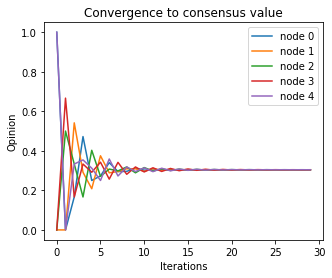

In [7]:
# Problem1 e
# number of iterations
n_iter = 30

# ksave the evolution of the consensus
x = np.zeros((len(G.nodes), n_iter))

# set initial condition (1,0,0,0,1)
x[:, 0] = np.array([1, 0, 0, 0, 1])
# evolve the states
for t in range(1, n_iter):
    x[:, t] = P @ x[:, t - 1]

x[:, n_iter - 1]

print("******\nProblem 1 - E : \n")
print("The consensus state is:", x[:, n_iter - 1])

values, vectors = np.linalg.eig(P.T)

# selects the eigenvalue 1 and print the eigenvector
for index in [i for i in range(len(G)) if np.isclose(values[i], 1)]:
    pi = vectors[:, index].real  # -> eigenvectors are complex but pi is real, so we convert it to real
    pi = pi / np.sum(pi)
# found pi, we have to multiply by the initial condition
x0 = x[:, 0]

print("The consensus value is:", pi @ x0)
print("\n*****")

# plot the record of the consensus vector to have a better look of the convergence
fig = plt.figure(1, figsize=(5, 4))
ax = plt.subplot(111)
for node in range(G.number_of_nodes()):
    trajectory = x[node, :]
    ax.plot(trajectory, label='node {0:d}'.format(node))

ax.legend()
ax.set_title("Convergence to consensus value")
plt.xlabel('Iterations')
plt.ylabel('Opinion')
plt.savefig("Ex1_E.svg")
plt.show()

**problem 1 _ f **

In [8]:
# Problem1 f
alfa_err = np.zeros(200)

# with numerical simulations
for i in range(200):

    # since rand returns random values in [0,1], mu = 1/2
    x = np.random.rand(5)
    for n in range(500):
        x = P @ x
    alfa_err[i] = (1 / 2 - np.mean(x)) * (1 / 2 - np.mean(x))

print("******\nProblem 1 - F : \n")
print("The variance of the consensus state is:", np.mean(alfa_err), "\n")
values, vectors = np.linalg.eig(Q.T)
index = np.argmax(values.real)
pi = vectors[:, index].real
pi = pi / np.sum(pi)
# uniform distribution, so the variance is 1/12
sigma = 1 / 12
print("Expected variance:", np.sum(np.square(pi)) * 1 / 12)
print("\n*****")

******
Problem 1 - F : 

The variance of the consensus state is: 0.021506366564129152 

Expected variance: 0.017032464563328763

*****


**problem 1 _ g **

******
Problem 1 - G : 

Arbitary initial condition x(0): [0.764 0.723 0.04  0.124 0.794]
The asymptotic state x is: [0.794 0.794 0.794 0.794 0.794]
The variance of the consensus state is: 0.07852765531998336 


*****


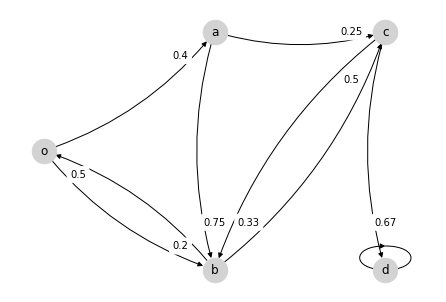

In [9]:
# Problem1 g
# remove edges
G.remove_edges_from([('d', 'a'), ('d', 'c')])
# add self loop to d
G.add_weighted_edges_from([('d', 'd', float("{0:.2f}".format(1 / 10000)))])
pos = {'o': (0, 0), 'a': (1, 2), 'b': (1, -2), 'c': (2, 2), 'd': (2, -2)}
nx.draw(G, pos=pos, with_labels=True, node_size=600, font_size=12, node_color='lightgray',
        connectionstyle='arc3, rad = 0.15')
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.20, rotate=False, horizontalalignment='center')

# calculate P
W = nx.adjacency_matrix(G)
W = W.toarray()
W[4][4] = 0.00001  # self loop weight lowest possible
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

n_iter = 70

# arbitrary initial condition
x = np.random.rand(5)

print("******\nProblem 1 - G : \n")
print('Arbitary initial condition x(0):', x)
for i in range(n_iter):
    x = P @ x
print("The asymptotic state x is:", x)

# with numerical simulations
for i in range(200):

    # since rand returns random values in [0,1], mu = 1/2
    x = np.random.rand(5)
    var = np.var(x)
    for n in range(500):
        x = P @ x
    alfa_err[i] = (1 / 2 - np.mean(x)) * (1 / 2 - np.mean(x))

print("The variance of the consensus state is:", np.mean(alfa_err), "\n")
print("\n*****")

**problem 1 _ h **

******
Problem 1 - H : 

Arbitary initial condition x(0): [0.664 0.536 0.895 0.286 0.917]


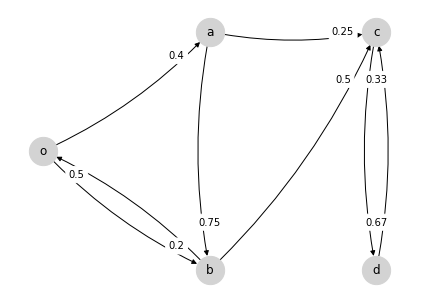

In [10]:
# Problem1 h
# reconstruct the new graph
G = nx.DiGraph()
G.add_weighted_edges_from([('o', 'a', float("{0:.2f}".format(2 / 5))), ('o', 'b', float("{0:.2f}".format(1 / 5))),
                           ('a', 'b', float("{0:.2f}".format(3 / 4))), ('a', 'c', float("{0:.2f}".format(1 / 4))),
                           ('b', 'o', float("{0:.2f}".format(1 / 2))), ('b', 'c', float("{0:.2f}".format(1 / 2))),
                           ('c', 'd', float("{0:.2f}".format(2 / 3))), ('d', 'c', float("{0:.2f}".format(1 / 3)))])

pos = {'o': (0, 0), 'a': (1, 2), 'b': (1, -2), 'c': (2, 2), 'd': (2, -2)}
nx.draw(G, pos=pos, with_labels=True, node_size=800, font_size=12, node_color='lightgray',
        connectionstyle='arc3, rad = 0.1')
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.20, rotate=False, horizontalalignment='center')

# reconstruct P
W = nx.adjacency_matrix(G)
W = W.toarray()
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

n_iter = 30

x = np.zeros((5, n_iter))
# arbitrary initial condition
x[:, 0] = np.random.rand(5)

print("******\nProblem 1 - H : \n")
print('Arbitary initial condition x(0):', x[:, 0])

In [11]:
# evolve the states
for t in range(1, n_iter):
    x[:, t] = P @ x[:, t - 1]

print("Final opinions:", x[:, n_iter - 1])
print("\n*****")

Final opinions: [0.626 0.65  0.431 0.917 0.286]

*****


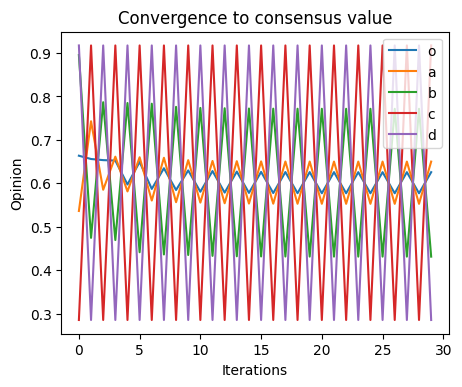

In [12]:
fig = plt.figure(figsize=(5, 4), dpi=100)
ax = plt.subplot(111)
node_names = ['o', 'a', 'b', 'c', 'd']

for node in range(5):
    op = x[node, :]
    ax.plot(range(n_iter), op, label=f'{node_names[node]}')

ax.legend()
ax.set_title("Convergence to consensus value")
plt.xlabel('Iterations')
plt.ylabel('Opinion')
plt.savefig("Ex1_H.svg")
plt.show()

# Exercise 2

**problem 2 _ A **


**********
Problem2
**********

******
Problem 2 - A : 

Average return time: 6.764747790576242 s
Average return time: 6.764747790576242
Error simulation 0.014747790576243425

*****
******
Problem 2 - B : 

Particles per node at final step:  {'o': 21.62, 'a': 14.04, 'b': 21.87, 'c': 21.22, 'd': 21.24}
Average number of particles in every node pi_bar:  [18.519 14.815 22.222 22.222 22.222]

*****


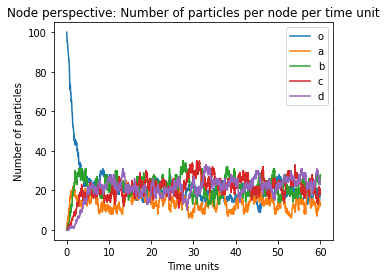

In [13]:
print("\n**********\nProblem2\n**********\n")
print("******\nProblem 2 - A : \n")
particles = np.array(range(100)).astype(np.int32)
simulationAvgTime = simulateRandomWalk(origin=1, destination=1, n_simulations=len(particles) * 1000)
print("Average return time:",simulationAvgTime)
print("Error simulation", abs(simulationAvgTime - expected_theoric))
print("\n*****")

# problem 2 - b

# stating with 100 particles in node 'o'
n_particles = 100  # Equal to the rate
time_units = 60
hist_nodes = np.array([[100, 0, 0, 0, 0]], dtype=float)  # 5 = num of nodes

n_nodes = np.zeros(len(G.nodes), dtype=float)
n_nodes[0] = n_particles
P_nodes = n_nodes / n_particles
P_nodes_cum = np.cumsum(P_nodes)

transition_times = []
transition_times.append(0)

t_next = -np.log(np.random.rand()) / n_particles
i = 0

timeSeq = []
timeSeq.append(0)

while transition_times[i] < time_units:
    i += 1

    transition_times.append(transition_times[i - 1] + t_next)
    timeSeq.append(transition_times[-1])

    start_index = np.argwhere(P_nodes_cum > np.random.rand())[0][0]
    dest_index = np.argwhere(Q_cum[start_index] >= np.random.rand())[0][0]

    n_nodes[dest_index] += 1
    n_nodes[start_index] -= 1

    hist_nodes = np.concatenate((hist_nodes, [n_nodes]), axis=0)

    P_nodes = n_nodes / n_particles
    P_nodes_cum = np.cumsum(P_nodes)

    t_next = -np.log(np.random.rand()) / n_particles

avg_particles = {}
for nodes, avg_value in zip(G.nodes, np.average(hist_nodes, axis=0)):
    avg_particles[nodes] = round(avg_value, 2)

    
print("******\nProblem 2 - B : \n")
print("Particles per node at final step: ", avg_particles)
print("Average number of particles in every node pi_bar: ", 100 * pi_bar)
print("\n*****")
fig, ax = plt.subplots(figsize=(5, 4))
labels = dict(enumerate(G.nodes))

for i in range(len(G)):
    ax.plot(timeSeq, hist_nodes[:, i], label=labels[i])

ax.legend()
ax.set_title("Node perspective: Number of particles per node per time unit")
plt.xlabel('Time units')
plt.ylabel('Number of particles')
plt.savefig("Ex2_B.svg")
plt.show()

**problem 2 _ B **

# Exercise 3

**problem 3 _ A **


**********
Problem3
**********

Number of nodes:  [18. 13. 28. 18. 23.]

Vector w:
 [1.125 1.    1.    1.    0.   ]

Matrix D:
 [[0.6  0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.67 0.  ]
 [0.   0.   0.   0.   0.33]]

Matrix P:
 [[0.    0.667 0.333 0.    0.   ]
 [0.    0.    0.75  0.25  0.   ]
 [0.5   0.    0.    0.5   0.   ]
 [0.    0.    0.    0.    1.   ]
 [0.    0.    0.    1.    0.   ]]

Matrix P_cum:
 [[0.    0.667 1.    1.    1.   ]
 [0.    0.    0.75  1.    1.   ]
 [0.5   0.5   0.5   1.    1.   ]
 [0.    0.    0.333 0.333 1.   ]
 [0.    0.5   0.5   1.    1.   ]]

Matrix Q:
 [[0.    0.667 0.333 0.    0.   ]
 [0.    0.111 0.222 0.222 0.444]
 [0.    0.    0.111 0.889 0.   ]
 [0.    0.    0.    0.111 0.889]
 [0.    0.    0.    0.    1.   ]]

Matrix Q_cum:
 [[0.    0.667 1.    1.    1.   ]
 [0.    0.111 0.333 0.556 1.   ]
 [0.    0.    0.111 1.    1.   ]
 [0.    0.    0.    0.111 1.   ]
 [0.    0.    0.    0.    1.   ]]


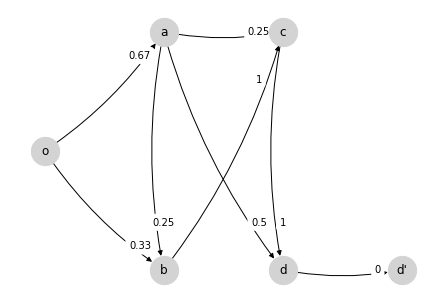

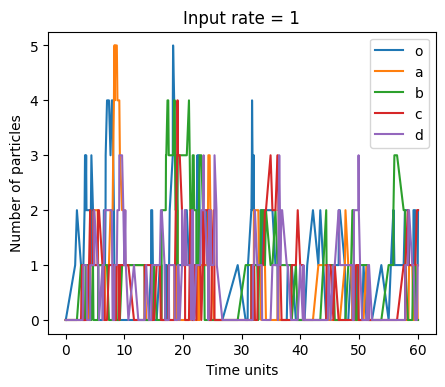

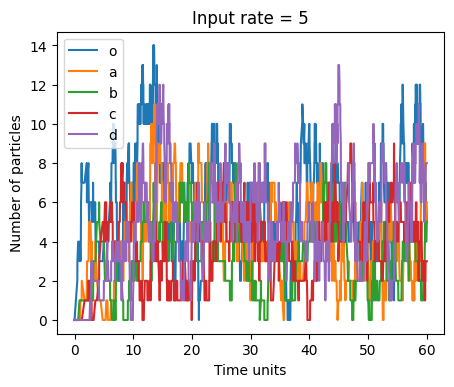

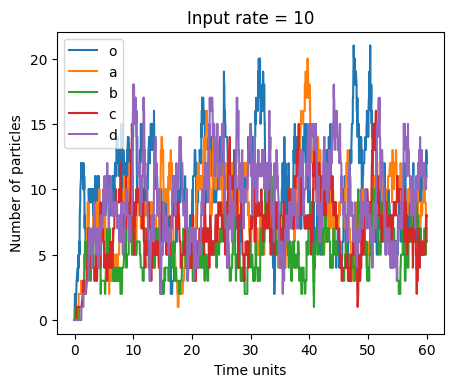

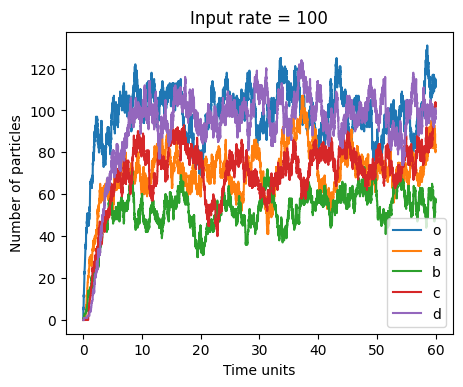

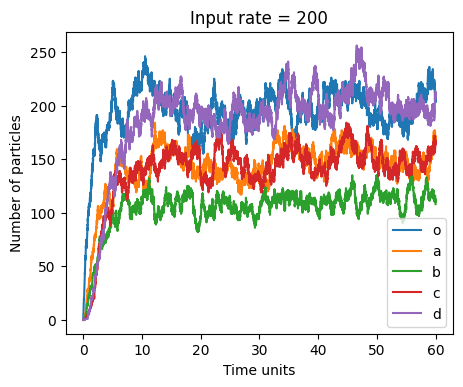

In [14]:
print("\n**********\nProblem3\n**********\n")
# draw graph
G = nx.DiGraph()
G.add_nodes_from(['o', 'a', 'b', 'c', 'd', "d'"])
G.add_weighted_edges_from([('o', 'a', float("{0:.2f}".format(2 / 3))), ('o', 'b', float("{0:.2f}".format(1 / 3))),
                           ('a', 'b', float("{0:.2f}".format(1 / 4))), ('a', 'c', float("{0:.2f}".format(1 / 4))),
                           ('a', 'd', float("{0:.2f}".format(2 / 4))), ('b', 'c', 1), ('c', 'd', 1), ('d', "d'", 0)])
pos = nx.spring_layout(G)
pos = {'o': (0, 0), 'a': (1, 2), 'b': (1, -2), 'c': (2, 2), 'd': (2, -2), "d'": (3, -2)}
nx.draw(G, pos=pos, with_labels=True, node_size=800, font_size=12, node_color='lightgray',
        connectionstyle='arc3, rad = 0.1')
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, label_pos=0.20, rotate=False, horizontalalignment='center')

lambda_matrix = [[0, 3/4, 3/8, 0,   0],
                 [0, 0, 1/4, 1/4, 2/4],
                 [0, 0,   0,   1,   0],
                 [0, 0,   0,   0,   1],
                 [0, 0,   0,   0,   0],
                 ]
w = np.sum(lambda_matrix, axis=1)

G_nodes = len(G.nodes)

w_star = np.max(w)
Q = lambda_matrix / w_star
Q = Q + np.diag(np.ones(len(w)) - np.sum(Q, axis=1))
Q_cum = np.cumsum(Q, axis=1)

print("Number of nodes: ", n_nodes)
print("\nVector w:\n", w)
print("\nMatrix D:\n", D)
print("\nMatrix P:\n", P)
print("\nMatrix P_cum:\n", P_cum)
print("\nMatrix Q:\n", Q)
print("\nMatrix Q_cum:\n", Q_cum)


def get_starting_node(node_particles, rate):
    particles = rate

    # 1 dummy variable for entry in node 'o'
    # Particles in nodes
    n_nodes = np.zeros(G_nodes)
    n_nodes[5] = rate

    particles += np.sum(node_particles)

    for i in range(G_nodes - 1):
        n_nodes[i] = node_particles[i]

    particles_cum = np.cumsum(n_nodes) / particles
    start_node = np.argwhere(particles_cum > np.random.rand())[0][0]
    # print(start_node)

    return start_node, particles


def simulate_proportional_rate(time_units, rate):
    # particles in node
    node_particles = np.zeros(G_nodes - 1)

    transition_times = []
    transition_times.append(0)

    hist_nodes = np.array([[0, 0, 0, 0, 0]])

    while True:

        start_node, particles = get_starting_node(node_particles, rate)
        t_next = transition_times[-1] - np.log(np.random.rand()) / particles

        # check dummy variable
        if start_node == 5:
            node_particles[0] += 1

        elif start_node == 4:
            node_particles[4] -= 1

        else:
            end_node = np.argwhere(Q_cum[start_node] > np.random.rand())[0][0]
            node_particles[start_node] -= 1
            node_particles[end_node] += 1

        transition_times.append(t_next)

        hist_nodes = np.concatenate((hist_nodes, [node_particles]), axis=0)

        if t_next > time_units:
            break

    return hist_nodes, transition_times

def plot_proportional_trajectories(transition_times, hist_nodes, input_rate):
    fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
    labels = {0: 'o', 1: 'a', 2: 'b', 3: 'c', 4: 'd'}
    for i in range(G_nodes - 1):  # only 5 nodes, excluding d'
        ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

    ax.legend()
    plt.xlabel("Time units")
    plt.ylabel("Number of particles")
    plt.title("Input rate = {}".format(input_rate))
    plt.savefig("ParticlesProportionalRate" + str(input_rate) + ".svg")
    plt.show()
    plt.close()


input_rates = [1, 5, 10, 100, 200]
time_units = 60
for input_rate in input_rates:
    hist_nodes, transition_times = simulate_proportional_rate(time_units, input_rate)
    plot_proportional_trajectories(transition_times, hist_nodes, input_rate)

**problem 3 _ B **

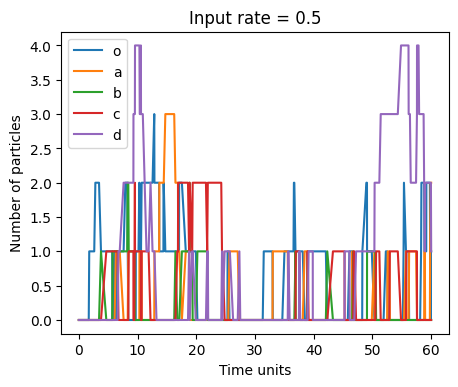

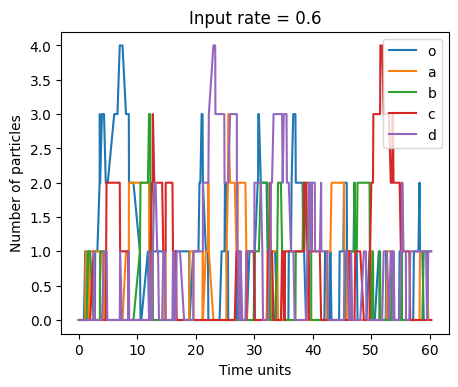

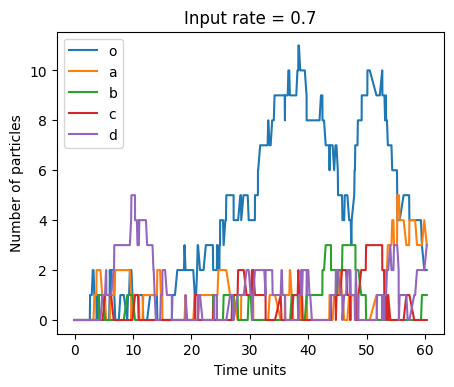

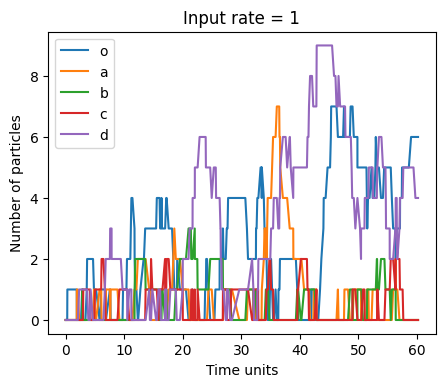

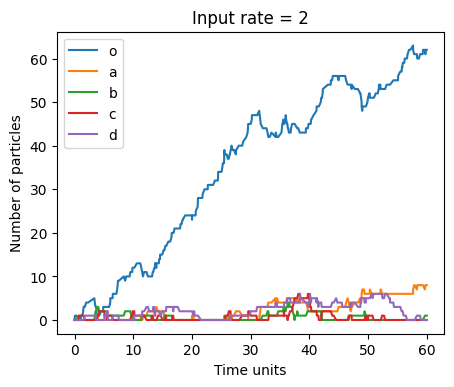

In [15]:
# problem 3 : B
def get_starting_node(rate):
    total_rate = rate

    # 1 dummy variable for entry in node 'o'
    n_nodes = np.zeros(G_nodes)
    n_nodes[5] = rate

    for i in range(G_nodes - 1):
        n_nodes[i] = 1
        total_rate += 1

    particles_cum = np.cumsum(n_nodes) / total_rate
    start_node = np.argwhere(particles_cum > np.random.rand())[0][0]

    return start_node, total_rate


def simulate_fixed_rate(time_units, rate):
    node_particles = np.zeros(G_nodes - 1)

    transition_times = []
    transition_times.append(0)

    hist_nodes = np.array([[0, 0, 0, 0, 0]])

    while True:

        start_node, total_rate = get_starting_node(rate)
        t_next = transition_times[-1] - np.log(np.random.rand()) / total_rate

        # check dummy variable
        if start_node == 5:
            node_particles[0] += 1

        elif node_particles[start_node] == 0:
            # Do nothing if I don't have any particle
            # Check after if start_nod == 5 but before start_node == 4.
            pass
        elif start_node == 4:
            node_particles[4] -= 1

        else:
            end_node = np.argwhere(Q_cum[start_node] > np.random.rand())[0][0]
            node_particles[start_node] -= 1
            node_particles[end_node] += 1

        transition_times.append(t_next)
        hist_nodes = np.concatenate((hist_nodes, [node_particles]), axis=0)

        if t_next > time_units:
            break

    return hist_nodes, transition_times


def plot_fixed_rate_trajectories(transition_times, hist_nodes, input_rate):
    fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
    labels = {0: 'o', 1: 'a', 2: 'b', 3: 'c', 4: 'd'}
    for i in range(G_nodes - 1):  # only 5 nodes, excluding d'
        ax.plot(transition_times, hist_nodes[:, i], label=labels[i])

    ax.legend()
    plt.xlabel("Time units")
    plt.ylabel("Number of particles")
    plt.title("Input rate = {}".format(input_rate))
    plt.savefig("ParticlesFixedRate" + str(input_rate) + ".svg")
    plt.show()
    plt.close()


input_rates = [0.5, 0.6, 0.7, 1, 2]
time_units = 60
for input_rate in input_rates:
    hist_nodes, transition_times = simulate_fixed_rate(time_units, input_rate)
    plot_fixed_rate_trajectories(transition_times, hist_nodes, input_rate)
